In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from forwards import LSI_utils, fft,ifft, gaussuian_filter

In [3]:
result_file = '/home/blevac/Diffusion_Inverse/lsi_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
diff_recon = cont['recon']
meas = cont['meas']
lsi_utils = cont['forward_utils']
psf = lsi_utils.psf
print(cont['nrmse'])

dict_keys(['gt_img', 'recon', 'meas', 'forward_utils', 'nrmse'])
0.41091838049616236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


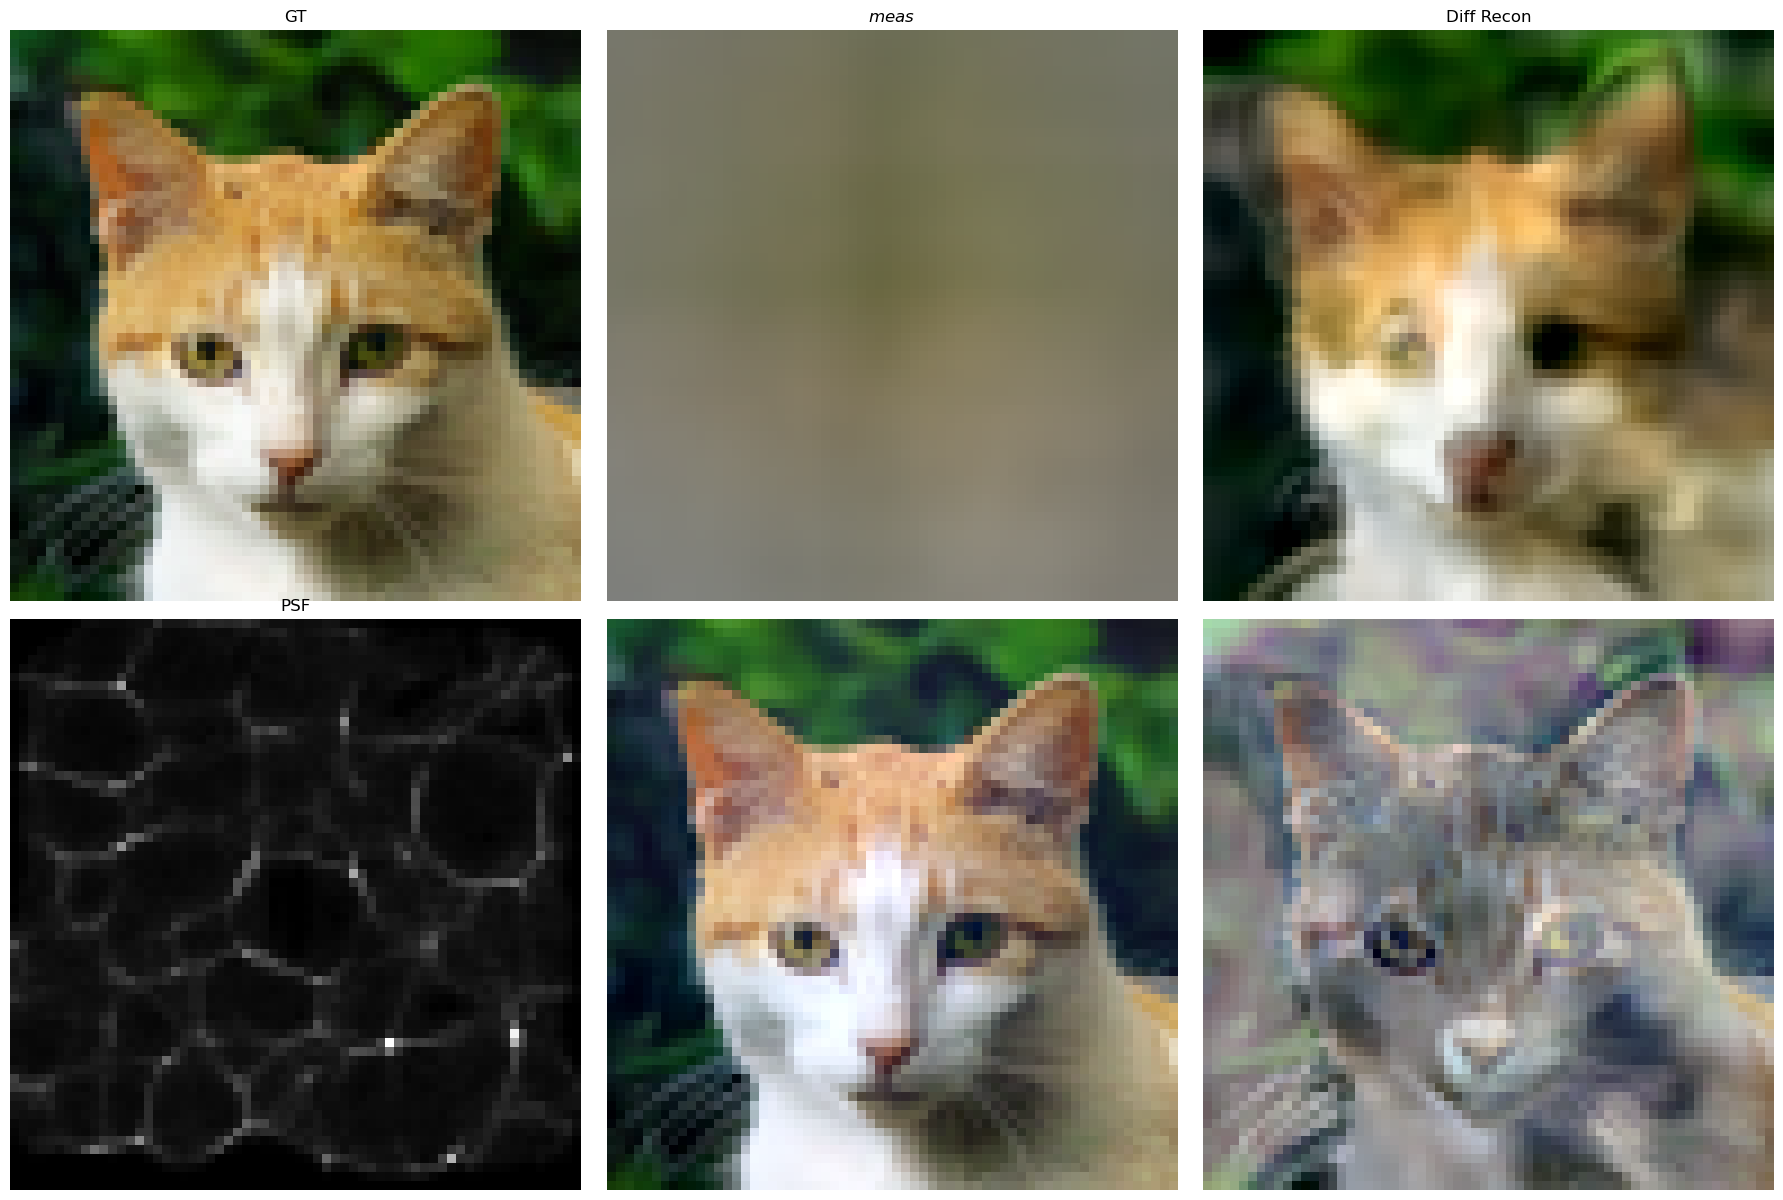

In [4]:
plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
plt.title('GT')
plt.imshow((gt_img[0].permute(-2,-1,0).cpu() + 1) /2)
plt.axis('off')
plt.subplot(2,4,5)
plt.title('PSF')
plt.imshow(psf[0,0].cpu(),cmap='gray')
plt.axis('off')

plt.subplot(2,4,2)
plt.title('$meas$')
plt.imshow((meas[0].permute(-2,-1,0).cpu().real + 1) /2)
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(((gt_img-meas)[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')


plt.subplot(2,4,3)
plt.title('Diff Recon')
plt.imshow((diff_recon[0].permute(-2,-1,0).cpu().real + 1) /2)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(((gt_img-diff_recon)[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
plt.tight_layout(pad=1.0)


In [6]:
# import PIL
# psf_file = '/csiNAS2/slow/brett/dataset/psf.tiff'
# start= 420
# stop = 420+1080
# psf = np.array(PIL.Image.open(psf_file),dtype='float32')[:,start:stop,2]
# print(psf.shape)
# def resize(img, factor):
#     num = int(-np.log2(factor))
#     for i in range(num):
#         img = 0.25*(img[::2,::2,...]+img[1::2,::2,...]+img[::2,1::2,...]+img[1::2,1::2,...])
#     return img 
# psf_rs = psf[56:,56:]
# factor = 1/16
# psf_rs = resize(psf_rs,factor)
# psf_rs = torch.tensor(psf_rs)
# psf_rs = psf_rs/torch.sum(psf_rs)
# print(psf_rs.shape)
# plt.figure()
# plt.imshow(psf,cmap='gray')
# plt.figure()
# plt.imshow(psf_rs,cmap='gray')
# torch.save(psf_rs,'psf_64x64.pt')